# Portfolio assignment week 6


## 1. Decision Trees and Naive bayes

the scikit-learn library provides different parameters for decision trees and naive bayes.

Based on the last code example in the accompanying notebook, add several new models to the classifiers variable. These models should have different parameters. For instance, create a new decision tree with a max depth of 1. Another possibility is to add different datasets or add noise.

Try to understand why some models behave differently than others. Give arguments what influences model performance and why.


## 2. Decision Tree Evaluation

As shown in the in the accompanying notebook it is possible to visualize the decision tree.

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the breast cancer dataset which you can find on assemblix2019 (/data/datasets/DS3/). Go through the data science pipeline as you've done before:

Try to understand the dataset globally.
Load the data.
Exploratory analysis
Preprocess data (skewness, normality, etc.)
Modeling (cross-validation and training)
Evaluation
Explanation

Explain how the decision tree behaves under certain circumstances. What features seem important and how are the decisions made?

## 3. Naive Bayes

During the Corona pandemic, seven roommates in a student house did a Corona test. The table below show the data of these students: whether they experiences shivers, had a running nose, or had a headache. The test result is also shown.

Roommate	shivers	running nose	headache	test result
1	         Y	    N	            No	        Negative
2	         N	    N	            Mild	    Negative
3	         Y	    Y	            No	        Positive
4	         N	    Y	            No	        Negative
5	         N	    N	            Heavy	    Positive
6	         Y	    N	            No	        Negative
7	         Y	    Y	            Mild	    Positive


Explain why it is not useful to include the column 'Roommate' in a classification procedure.

Train a Categorical Naive Bayes classifier on this dataset, where the Test Results are your classes and the other features the data. For this to work, you'll need Pandas get_dummies to transform the nominal data into something that sklearn can work with. Use all seven rows in your training.

If you let your fitted classifier predict the test results (based on all the data), you will (hopefully) see that the prediction for observation number 5 (1-based) is wrong (it predicts Negative while the actual value is Positive). Show by manual calculation that the prediction for this instance is indeed higher ($p=0.527$) for the Negative class than for the Positive class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the data file
data_brc_nb = pd.read_csv('datasets_DS3\\breast-cancer.csv')

data_brc_nb.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data_brc_nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data_brc_nb.shape

(569, 32)

In [5]:
data_brc_nb.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data_brc_nb['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# Cleaning and modifying the data
data_brc_nb_clean = data_brc_nb.drop('id',axis=1)

In [8]:
# Mapping Benign to 0 and Malignant to 1 
data_brc_nb_clean['diagnosis'] = data_brc_nb_clean['diagnosis'].map({'M':1,'B':0})

In [9]:
corr_mat = data_brc_nb_clean.corr()
# Strip out the diagonal values for the next step
for x in range(len(data_brc_nb_clean.columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,0.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,0.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,0.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,0.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,0.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,0.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,0.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,0.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,0.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [10]:
# see which features are highly correlated
# Pairwise maximal correlations
corr_mat.abs().idxmax()

diagnosis                     concave points_worst
radius_mean                         perimeter_mean
texture_mean                         texture_worst
perimeter_mean                         radius_mean
area_mean                              radius_mean
smoothness_mean                   smoothness_worst
compactness_mean                    concavity_mean
concavity_mean                 concave points_mean
concave points_mean                 concavity_mean
symmetry_mean                       symmetry_worst
fractal_dimension_mean     fractal_dimension_worst
radius_se                             perimeter_se
texture_se                             symmetry_se
perimeter_se                             radius_se
area_se                                  radius_se
smoothness_se                 fractal_dimension_se
compactness_se                fractal_dimension_se
concavity_se                        compactness_se
concave points_se                     concavity_se
symmetry_se                    

In [11]:
# how much are they correlated? Can we eliminate certain features based on high correlations
corr_mat.abs().max()

diagnosis                  0.793566
radius_mean                0.997855
texture_mean               0.912045
perimeter_mean             0.997855
area_mean                  0.987357
smoothness_mean            0.805324
compactness_mean           0.883121
concavity_mean             0.921391
concave points_mean        0.921391
symmetry_mean              0.699826
fractal_dimension_mean     0.767297
radius_se                  0.972794
texture_se                 0.411621
perimeter_se               0.972794
area_se                    0.951830
smoothness_se              0.427374
compactness_se             0.803269
concavity_se               0.801268
concave points_se          0.771804
symmetry_se                0.449137
fractal_dimension_se       0.803269
radius_worst               0.993708
texture_worst              0.912045
perimeter_worst            0.993708
area_worst                 0.984015
smoothness_worst           0.805324
compactness_worst          0.892261
concavity_worst            0

In [12]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (data_brc_nb_clean
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
dtype: float64

In [13]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data_brc_nb_clean[col] = np.log1p(data_brc_nb_clean[col])

#### Applying log transformations before using the dataset for machine learning predictions is important because:
#### It enhances the model's ability to capture patterns in the data, especially if the original skewed distribution hindered that.
#### It aligns with the assumptions of many machine learning algorithms that expect input features to be normally distributed.
#### It can lead to more accurate predictions and better generalization to new, unseen data.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [15]:
# scaler = MinMaxScaler()
# scaler.fit(data_brc_nb_clean)
# scaled_features = scaler.transform(data_brc_nb_clean)
# scaled_features

In [16]:
X = data_brc_nb_clean.drop('diagnosis', axis=1)
y= data_brc_nb_clean['diagnosis']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape) 

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [19]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Naive bayes

#### The implementation of Naive Bayes on this dataset is to classify the data into either 'Malignant or 'Benign' based occurences found in the dataset of the breast cancer. 

#### The use of multinommial: 

In [21]:
from sklearn.naive_bayes import MultinomialNB 
NB_classifier = MultinomialNB()
accuracies = cross_val_score(NB_classifier, X_train, y_train, cv=5)
NB_classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",NB_classifier.score(X_test,y_test))

Train Score: 0.7582417582417582
Test Score: 0.7719298245614035


#### The use of complement:

In [22]:
from sklearn.naive_bayes import ComplementNB
NB_classifier = ComplementNB()
accuracies = cross_val_score(NB_classifier, X_train, y_train, cv=5)
NB_classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",NB_classifier.score(X_test,y_test))

Train Score: 0.8769230769230768
Test Score: 0.9035087719298246


In [23]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = NB_classifier.score(X_test,y_test)

### Function for Naive Bayes (Multinomial)

In [24]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import cross_val_score

def train_and_evaluate_naive_bayes_multi(X_train, y_train, X_test, y_test):
    # Initialize the Naive Bayes classifier
    MNB_classifier = MultinomialNB()

    # Perform cross-validation on the training set
    accuracies = cross_val_score(MNB_classifier, X_train, y_train, cv=5)

    # Fit the model on the training set
    MNB_classifier.fit(X_train, y_train)

    # Calculate and store the training and test scores
    result_dict_train = {}
    result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
    result_dict_test = {}
    result_dict_test["Naive Bayes Default Test Score"] = MNB_classifier.score(X_test, y_test)

    # Print the results
    print("Train Score:", result_dict_train["Naive Bayes Default Train Score"])
    print("Test Score:", result_dict_test["Naive Bayes Default Test Score"])

    return result_dict_train, result_dict_test

result_dict_train, result_dict_test = train_and_evaluate_naive_bayes_multi(X_train, y_train, X_test, y_test)

Train Score: 0.7582417582417582
Test Score: 0.7719298245614035


### Function for Naive Bayes (Complement)

In [25]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score

def train_and_evaluate_naive_bayes_cmp(X_train, y_train, X_test, y_test):
    # Initialize the Naive Bayes classifier
    CMNB_classifier = ComplementNB()

    # Perform cross-validation on the training set
    accuracies = cross_val_score(CMNB_classifier, X_train, y_train, cv=5)

    # Fit the model on the training set
    CMNB_classifier.fit(X_train, y_train)

    # Calculate and store the training and test scores
    result_dict_train = {}
    result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
    result_dict_test = {}
    result_dict_test["Naive Bayes Default Test Score"] = CMNB_classifier.score(X_test, y_test)

    # Print the results
    print("Train Score:", result_dict_train["Naive Bayes Default Train Score"])
    print("Test Score:", result_dict_test["Naive Bayes Default Test Score"])

    return result_dict_train, result_dict_test

result_dict_train, result_dict_test = train_and_evaluate_naive_bayes_cmp(X_train, y_train, X_test, y_test)

Train Score: 0.8769230769230768
Test Score: 0.9035087719298246


### AUC ROC

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [27]:
# Multinomial Naive Bayes
model1 = MultinomialNB()
# Complement Naive Bayes
model2 = ComplementNB()

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict(X_test)
pred_prob2 = model2.predict(X_test)

In [28]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [29]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1)
auc_score2 = roc_auc_score(y_test, pred_prob2)

print('MultinomialNB AUC Score: ' ,auc_score1,'ComplementNB AUC Score: ' ,auc_score2)

MultinomialNB AUC Score:  0.6976744186046512 ComplementNB AUC Score:  0.9041925974451359


#### The results generated above from the AUC, tells you that multinomial classifier received a score of 0.7 which is acceptable (but is just on the boundary of acceptable), while for the complement classifier recieved a score of 0.9 (this is a bit over 0.9 which is considered good to excellent). The latter (complement) classifier has a better performance for discriminating and classifying the data overall. 

### Precision-recall curve for Multinomial and Complement Naive Bayes

In [30]:
# Predict probability for Multinomial NB
y_prob_train = model1.predict(X_train)
y_prob_test = model1.predict(X_test)

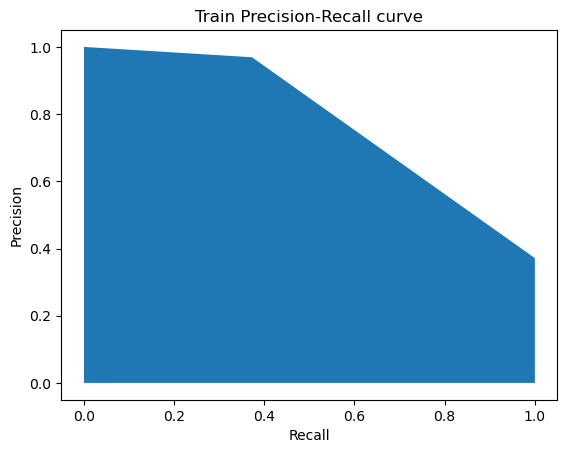

In [31]:
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [32]:
# Predict probability for the Complement NB
y_prob_train = model2.predict(X_train)
y_prob_test = model2.predict(X_test)

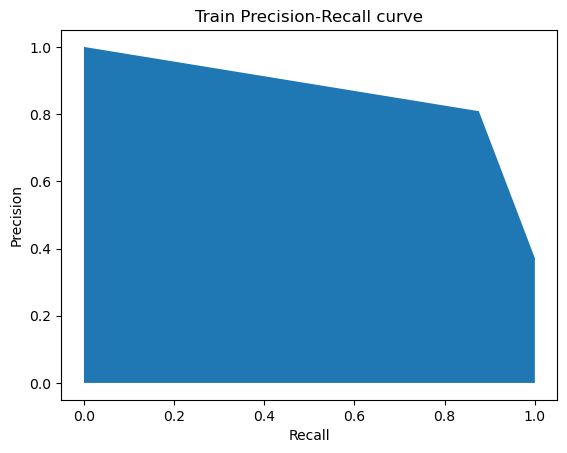

In [33]:
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

### Classification report and confusion matrix for Multinomial Naive Bayes

In [34]:
model_MNB = MultinomialNB()
#Fit model on the training Data
model_MNB.fit(X_train,y_train)
#Make prediction
predictions_MNB = model_MNB.predict(X_test)

In [35]:
conf_matrix_MNB = confusion_matrix(predictions_MNB,y_test)
print(conf_matrix_MNB)

[[71 26]
 [ 0 17]]


In [36]:
#Lets calculate Precision, Recall and F1 score for label 0 and 1
#For Label 0
tp = conf_matrix_MNB[0,0]
fp = conf_matrix_MNB[1,0]
fn = conf_matrix_MNB[0,1]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 0')
print('The precision for label 0 is: {0:.2f}'.format(precision))
print('The recall for label 0 is: {0:.2f}'.format(recall))
print('The f1-score for label 0 is: {0:.2f}'.format(f1_score))
print('\n')

#For Label 1 

tp = conf_matrix_MNB[1,1]
fp = conf_matrix_MNB[0,1]
fn = conf_matrix_MNB[1,0]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 1')
print('The precision for label 1 is: {0:.2f}'.format(precision))
print('The recall for label 1 is: {0:.2f}'.format(recall))
print('The f1-score for label 1 is: {0:.2f}'.format(f1_score))

precision, recall and f1-score for label 0
The precision for label 0 is: 1.00
The recall for label 0 is: 0.73
The f1-score for label 0 is: 0.85


precision, recall and f1-score for label 1
The precision for label 1 is: 0.40
The recall for label 1 is: 1.00
The f1-score for label 1 is: 0.57


In [37]:
print(classification_report(predictions_MNB,y_test))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        97
           1       0.40      1.00      0.57        17

    accuracy                           0.77       114
   macro avg       0.70      0.87      0.71       114
weighted avg       0.91      0.77      0.80       114



#### This gives the macro (which treats all classes equally and provides a balanced view of performance across classes, making it useful when class imbalances are not a concern)and weighted (which accounts for class imbalances and provides a performance measure that takes into consideration the distribution of instances in each class) averages that provide summarized metrics that give you an overall view of the model's performance across the classes for the dataset of breast cancer based on 'Malignant' and 'Benign'. 
#### the classification report provides a detailed breakdown of the model's performance for both classes (labels 0 and 1 or True positive and True negative) along with macro and weighted averages. The model generally demonstrates a reasonably average performance, with an average precision and recall for most classes. The overall accuracy of 77% suggests that the model is performing well on average on the dataset using the method Multinomial of Naive Bayes

### Classification report and confusion matrix for Complement Naive Bayes

In [38]:
model_CNB = ComplementNB()
#Fit model on the training Data
model_CNB.fit(X_train,y_train)
#Make prediction
predictions_CNB = model_CNB.predict(X_test)

In [39]:
conf_matrix_CNB = confusion_matrix(predictions_CNB,y_test)
print(conf_matrix_CNB)

[[64  4]
 [ 7 39]]


In [40]:
#Lets calculate Precision, Recall and F1 score for label 0 and 1
#For Label 0
tp = conf_matrix_CNB[0,0]
fp = conf_matrix_CNB[1,0]
fn = conf_matrix_CNB[0,1]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 0')
print('The precision for label 0 is: {0:.2f}'.format(precision))
print('The recall for label 0 is: {0:.2f}'.format(recall))
print('The f1-score for label 0 is: {0:.2f}'.format(f1_score))
print('\n')

#For Label 1 

tp = conf_matrix_CNB[1,1]
fp = conf_matrix_CNB[0,1]
fn = conf_matrix_CNB[1,0]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 1')
print('The precision for label 1 is: {0:.2f}'.format(precision))
print('The recall for label 1 is: {0:.2f}'.format(recall))
print('The f1-score for label 1 is: {0:.2f}'.format(f1_score))

precision, recall and f1-score for label 0
The precision for label 0 is: 0.90
The recall for label 0 is: 0.94
The f1-score for label 0 is: 0.92


precision, recall and f1-score for label 1
The precision for label 1 is: 0.91
The recall for label 1 is: 0.85
The f1-score for label 1 is: 0.88


In [41]:
print(classification_report(predictions_CNB,y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        68
           1       0.91      0.85      0.88        46

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



#### This gives the macro (which treats all classes equally and provides a balanced view of performance across classes, making it useful when class imbalances are not a concern)and weighted (which accounts for class imbalances and provides a performance measure that takes into consideration the distribution of instances in each class) averages that provide summarized metrics that give you an overall view of the model's performance across the classes for the dataset of breast cancer based on 'Malignant' and 'Benign'. 
#### the classification report provides a detailed breakdown of the model's performance for both classes (labels 0 and 1 or True positive and True negative) along with macro and weighted averages. The model generally demonstrates a reasonably balanced performance, with good precision and recall for most classes. The overall accuracy of 90% suggests that the model is performing reasonably well on the dataset using the method Complement of Naive Bayes

## Naive Bayes on Corona symptoms mini-dataset

In [42]:
# Read the data file
data_corona_nb = pd.read_csv('datasets_DS3\\corona_symptoms_data.txt', sep='\t')

data_corona_nb.head(7)

,Roommate,shivers,running nose,headache,test result
0,1,Y,N,No,Negative
1,2,N,N,Mild,Negative
2,3,Y,Y,No,Positive
3,4,N,Y,No,Negative
4,5,N,N,Heavy,Positive
5,6,Y,N,No,Negative
6,7,Y,Y,Mild,Positive


#### Explain why it is not useful to include the column 'Roommate' in a classification procedure. 

#### The column Roommate is not very useful in the training the dataset of the corona symptoms because it has no value in giving results to the machine learning algorithm. During data analysis, python takes that from 1 till 7 which will make the model think that 7 is the most important while 1 is the least important due to higher numerical value, thus treating them as ordinal 

In [43]:
data_corona_nb.dtypes

Roommate         int64
shivers         object
running nose    object
headache        object
test result     object
dtype: object

In [44]:
data_corona_nb.drop(['Roommate'], inplace=True, axis=1)

In [45]:
# from sklearn.preprocessing import OneHotEncoder

# # Converting type of columns to category
# data_corona_nb['shivers'] = data_corona_nb['shivers'].astype('category')
# data_corona_nb['running nose'] = data_corona_nb['running nose'].astype('category')
# data_corona_nb['headache'] = data_corona_nb['headache'].astype('category')
# data_corona_nb['test result'] = data_corona_nb['test result'].astype('category')

In [46]:
# # Assigning numerical values and storing it in another columns
# data_corona_nb['shiv_new'] = data_corona_nb['shivers'].cat.codes
# data_corona_nb['run_new'] = data_corona_nb['running nose'].cat.codes
# data_corona_nb['head_new'] = data_corona_nb['headache'].cat.codes
# data_corona_nb['test_re_new'] = data_corona_nb['test result'].cat.codes
  
  
# # Create an instance of One-hot-encoder
# enc = OneHotEncoder()
  
# # Passing encoded columns
  
# enc_data = pd.DataFrame(enc.fit_transform(
#     data_corona_nb[['shiv_new', 'run_new', 'head_new', 'test_re_new']]).toarray())
  
# # Merge with main
# new_df_corona = data_corona_nb.join(enc_data)
  
# print(new_df_corona)

### the code used above is taken from: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

In [47]:
data_corona_nb

,shivers,running nose,headache,test result
0,Y,N,No,Negative
1,N,N,Mild,Negative
2,Y,Y,No,Positive
3,N,Y,No,Negative
4,N,N,Heavy,Positive
5,Y,N,No,Negative
6,Y,Y,Mild,Positive


In [48]:
from sklearn.preprocessing import OneHotEncoder

oenc = OneHotEncoder()
multiple_enc = oenc.fit_transform(data_corona_nb[['shivers', 'running nose', 'headache', 'test result']])

multiple_enc = multiple_enc.toarray()

# Use get_feature_names_out() to get column names
feature_names = oenc.get_feature_names_out(input_features=['shivers', 'running nose', 'headache', 'test result'])
multiple_enc_corona_nb = pd.DataFrame(multiple_enc, columns=feature_names)

# encode_data_corona_nb = pd.concat([data_corona_nb, multiple_enc], axis=1)

In [49]:
multiple_enc_corona_nb

,shivers_ N,shivers_ Y,running nose_ N,running nose_ Y,headache_ Heavy,headache_ Mild,headache_ No,test result_ Negative,test result_ Positive,test result_ Negative,test result_ Positive
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [50]:
# Merging columns
multiple_enc_corona_nb['merged_test_positive'] = multiple_enc_corona_nb['test result_        Positive'] + multiple_enc_corona_nb['test result_    Positive'].astype(int)

In [51]:
# Merging columns
multiple_enc_corona_nb['merged_test_negative'] = multiple_enc_corona_nb['test result_        Negative'] + multiple_enc_corona_nb['test result_    Negative'].astype(int)

In [52]:
multiple_enc_corona_nb.columns

Index(['shivers_         N', 'shivers_         Y', 'running nose_    N',
       'running nose_    Y', 'headache_            Heavy',
       'headache_            Mild', 'headache_            No',
       'test result_        Negative', 'test result_        Positive',
       'test result_    Negative', 'test result_    Positive',
       'merged_test_positive', 'merged_test_negative'],
      dtype='object')

In [53]:
# multiple_enc_corona_nb(['test result_        Negative', 'test result_        Positive', 'test result_    Negative', 'test result_    Positive'], inplace=True, axis=1)

In [54]:
selected_columns = ['shivers_         N', 'shivers_         Y', 'running nose_    N',
                    'running nose_    Y', 'headache_            Heavy',
                    'headache_            Mild', 'headache_            No','merged_test_positive', 'merged_test_negative']
multiple_enc_corona_nb = multiple_enc_corona_nb[selected_columns]

In [55]:
multiple_enc_corona_nb

,shivers_ N,shivers_ Y,running nose_ N,running nose_ Y,headache_ Heavy,headache_ Mild,headache_ No,merged_test_positive,merged_test_negative
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [56]:
X_1 = multiple_enc_corona_nb.drop('merged_test_negative', axis=1)
y_1= multiple_enc_corona_nb['merged_test_negative']

In [57]:
# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [58]:
print("X_train shape:",X_train_1.shape)
print("X_test shape:",X_test_1.shape)
print("y_train shape:",y_train_1.shape)
print("y_test shape:",y_test_1.shape) 

X_train shape: (5, 8)
X_test shape: (2, 8)
y_train shape: (5,)
y_test shape: (2,)


In [59]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

In [60]:
# from sklearn.naive_bayes import CategoricalNB 
# NB_classifier = CategoricalNB()
# accuracies = cross_val_score(NB_classifier, X_train_1, y_train_1, cv=2)
# NB_classifier.fit(X_train_1, y_train_1)

# print("Train Score:",np.mean(accuracies))
# print("Test Score:",NB_classifier.score(X_test_1 ,y_test_1))

### Function for Naive Bayes Categorical

In [61]:
from sklearn.naive_bayes import CategoricalNB 
from sklearn.model_selection import cross_val_score

def train_and_evaluate_naive_bayes_cat(X_train_1, y_train_1, X_test_1, y_test_1):
    # Initialize the Naive Bayes classifier
    CTNB_classifier = CategoricalNB()

    # Perform cross-validation on the training set
    accuracies = cross_val_score(CTNB_classifier, X_train_1, y_train_1, cv=2)

    # Fit the model on the training set
    CTNB_classifier.fit(X_train_1, y_train_1)

    # Calculate and store the training and test scores
    result_dict_train = {}
    result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
    result_dict_test = {}
    result_dict_test["Naive Bayes Default Test Score"] = CTNB_classifier.score(X_test_1, y_test_1)

    # Print the results
    print("Train Score:", result_dict_train["Naive Bayes Default Train Score"])
    print("Test Score:", result_dict_test["Naive Bayes Default Test Score"])

    return result_dict_train, result_dict_test

result_dict_train, result_dict_test = train_and_evaluate_naive_bayes_cat(X_train_1, y_train_1, X_test_1, y_test_1)

Train Score: nan
Test Score: 1.0


In [62]:
model = CategoricalNB()

model.fit(X_train_1, y_train_1);

In [63]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test_1)

accuray = accuracy_score(y_pred, y_test_1)
f1 = f1_score(y_pred, y_test_1, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


### The code above is taken from: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

---

### Classification report and confusion matrix for Categorical Naive Bayes

In [64]:
model_CTNB = CategoricalNB()
#Fit model on the training Data
model_CTNB.fit(X_train,y_train)
#Make prediction
predictions_CTNB = model_CTNB.predict(X_test)

In [65]:
conf_matrix_CTNB = confusion_matrix(predictions_CTNB,y_test)
print(conf_matrix_CTNB)

[[70  7]
 [ 1 36]]


In [66]:
#Lets calculate Precision, Recall and F1 score for label 0 and 1
#For Label 0
tp = conf_matrix_CTNB[0,0]
fp = conf_matrix_CTNB[1,0]
fn = conf_matrix_CTNB[0,1]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 0')
print('The precision for label 0 is: {0:.2f}'.format(precision))
print('The recall for label 0 is: {0:.2f}'.format(recall))
print('The f1-score for label 0 is: {0:.2f}'.format(f1_score))
print('\n')

#For Label 1 

tp = conf_matrix_CTNB[1,1]
fp = conf_matrix_CTNB[0,1]
fn = conf_matrix_CTNB[1,0]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 1')
print('The precision for label 1 is: {0:.2f}'.format(precision))
print('The recall for label 1 is: {0:.2f}'.format(recall))
print('The f1-score for label 1 is: {0:.2f}'.format(f1_score))

precision, recall and f1-score for label 0
The precision for label 0 is: 0.99
The recall for label 0 is: 0.91
The f1-score for label 0 is: 0.95


precision, recall and f1-score for label 1
The precision for label 1 is: 0.84
The recall for label 1 is: 0.97
The f1-score for label 1 is: 0.90


In [67]:
print(classification_report(predictions_CTNB,y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        77
           1       0.84      0.97      0.90        37

    accuracy                           0.93       114
   macro avg       0.91      0.94      0.92       114
weighted avg       0.94      0.93      0.93       114

